In [ ]:
#!pip install nltk
#!pip install folium

## EDA ON GULF TWEETS

In [53]:
import nltk

In [54]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline  

In [55]:
pd.options.display.max_colwidth = 75

In [56]:
pwd

'/home/jovyan/capstone-35/eda'

In [57]:
#cd ../../capstone-35/gulf_twitter_raw/gulf_timelines/

In [8]:
cd ../../capstone-35/gulf_twitter_pickled

/home/jovyan/capstone-35/gulf_twitter_pickled


In [9]:
ls

stream_أثول.p                   user_timeline_fhth2020.p
stream_الطريج.p                 user_timeline_GhadaSabt.p
stream_تميلح.p                  user_timeline_hoossin2012.p
stream_ثقيل.p                   user_timeline_LabeebHub.p
stream_مغسلة.p                  user_timeline_mSvP68iXNTp6LgW.p
user_timeline_careless_83.p     user_timeline_VegiAlaa.p
user_timeline_d7mts.p           user_timeline_xxt44.p
user_timeline_f_alabdulkarim.p


### Instantiate cleaned pickles

In [58]:
df_batch_1 = pd.read_pickle('../gulf_twitter_pickled/stream_الطريج.p')

### Identify most frequent `locations` and `names`

In [59]:
df_batch_1.cleaned_geo.value_counts().head()

None               62
Kuwait             53
Saudi Arabia        3
UAE                 2
بعيدة عن المنال     1
Name: cleaned_geo, dtype: int64

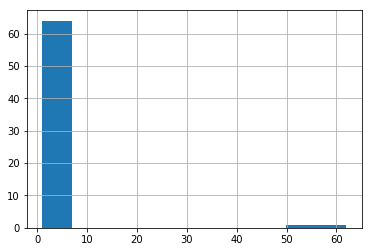

In [60]:
df_batch_1.cleaned_geo.value_counts().hist()

In [97]:
df_batch_1.cleaned_name.value_counts().head()

Re9912Re    2622
Name: cleaned_name, dtype: int64

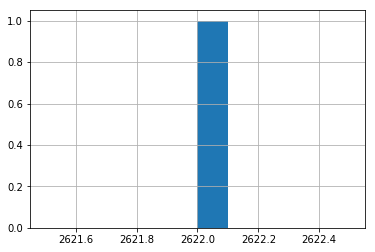

In [98]:
df_batch_1.cleaned_name.value_counts().hist()

In [99]:
df_batch_1.cleaned_geo.unique()

array(['Saudi Arabia'], dtype=object)

In [100]:
df_batch_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2622 entries, 0 to 3198
Data columns (total 3 columns):
cleaned_text    2622 non-null object
cleaned_name    2622 non-null object
cleaned_geo     2622 non-null object
dtypes: object(3)
memory usage: 81.9+ KB


In [101]:
df_batch_1.cleaned_name.nunique()

1

__Finding users with highest lexical diversity scores to add them to timelines search__

In [12]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [13]:
#creating cleaned text score in a new column
df_batch_1['cleaned_text_score'] = df_batch_1['cleaned_text'].map(lambda x: lexical_diversity(x))

In [14]:
#creating length of cleaned text in a new column to remove short tweets w/high lexical diversity score
df_batch_1['cleaned_text_len'] = df_batch_1['cleaned_text'].map(lambda x: len(x))

In [15]:
#creating mask of tweets w/ lexical diversity scores over 0.4
df_highest_user_scores = df_batch_1.loc[df_batch_1['cleaned_text_score'] >= 0.4, ['cleaned_name','cleaned_text_score', 'cleaned_text', 'cleaned_text_len']]

In [16]:
#adding mask to exclude tweets under 40 characters
df_highest_user_scores[(df_highest_user_scores['cleaned_text_score'] >= 0.10) 
                         & (df_highest_user_scores['cleaned_text_len'] >= 10)]

,cleaned_name,cleaned_text_score,cleaned_text,cleaned_text_len
7,Hasan95780025,0.454545,وحدة مكافحة الموز في الطريج الموز,33
17,hodaaa_q8,0.566667,اوك مسافة الطريج يايتلچ ‍️‍️‍️,30
26,R__Aey,0.500000,لما أكون مستعيله ويغلط السواق ف الطريج,38
42,f36s_x,0.631579,ماشفت هالشي شنو هذا,19
53,alnweiam,0.687500,الطريج يخوف بليل,16
55,subzoe,0.526316,الله يحييچ يلا مسافة الطريج وأكون عندچ,38
105,mhseen11,0.450000,اتمنى مناقشة طريج الوفرة تعبنا من الطريج,40
121,paulsmith_66,0.600000,وقتها تذكرون شنو صار,20
127,HKBMDH77,0.608696,الحين أمرج مسافه الطريج,23
158,RienMieuxQueMoi,1.000000,عبده التصوير,12


In [17]:
df_highest_user_scores.sort_values('cleaned_text_score', ascending=False).head()

,cleaned_name,cleaned_text_score,cleaned_text,cleaned_text_len
170,bander9910,1.0,الطريج,6
68,Rel211_,1.0,شلون جذي,8
162,ilulwaa06,1.0,ف الطريج,8
158,RienMieuxQueMoi,1.0,عبده التصوير,12
136,shosha1q,1.0,…,1


### Conduct EDA on tweets

In [18]:
word_list = [word for line in df_batch_1['cleaned_text'] for word in line.split()]

In [19]:
word_list[:10]

['على', 'الاقل', 'ارحم', 'من', 'ان', 'تتعود', 'على', 'وجود', 'احد', 'ويغرقك']

In [20]:
word_list.count('عجل')

0

In [21]:
len(word_list)

2044

In [22]:
vocab = set(word_list)
vocab_size = len(vocab)
vocab_size

1218

In [23]:
from nltk.text import Text  

In [24]:
text_eda = Text(word_list)

In [25]:
def percentage(count, total):
    return 100 * count / total

In [26]:
percentage(text_eda.count('عجل'), len(text_eda))

0.0

In [28]:
text_eda.concordance("الطريج")

Displaying 25 of 148 matches:
                                    الطريج يخليك تعاني وتت… وحدة مكافحة الموز 
ليك تعاني وتت… وحدة مكافحة الموز في الطريج الموز اوك مسافة الطريج يايتلچ ‍️‍️‍
فحة الموز في الطريج الموز اوك مسافة الطريج يايتلچ ‍️‍️‍️ كلام جميل لكن وين الت
ان وللحين احنا ناطرين ا… الثالث علي الطريج طولي بالج اول الله️ لما أكون مستعيل
له️ لما أكون مستعيله ويغلط السواق ف الطريج احبك كثر ماتوقف على جنب الطريج اشجا
اق ف الطريج احبك كثر ماتوقف على جنب الطريج اشجار احبك كثر مايقسى الشتا وتهاجر 
الله الخيره ماتحسفت الا يوم وصلت نص الطريج بنجر علي التاير بنص الطريج و رجعت ب
 وصلت نص الطريج بنجر علي التاير بنص الطريج و رجعت بتكسي ايي والله بغيت اغير طر
ت اغير طريجي والسبه اني مابي افتحله الطريج وداااايس الطريج يخوف بليل الله يحيي
سبه اني مابي افتحله الطريج وداااايس الطريج يخوف بليل الله يحييچ يلا مسافة الطر
طريج يخوف بليل الله يحييچ يلا مسافة الطريج وأكون عندچ متعه في خط سريع فاضي بال
ه وبعد سوالفه تسمع طرب ابو نوره ودك الطريج يطول️ شلون جذي أقسم بالله لو صايرة 
ة اتمنى مناقشة طريج ال

In [29]:
from nltk import FreqDist

In [30]:
fdist1 = FreqDist(text_eda)

In [31]:
vocabulary1 = list(fdist1.keys())
vocabulary1[:10]

['على',
 'الاقل',
 'ارحم',
 'من',
 'ان',
 'تتعود',
 'وجود',
 'احد',
 'ويغرقك',
 'اهتمام']

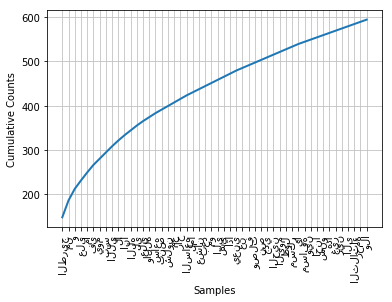

In [32]:
fdist1.plot(50, cumulative=True)

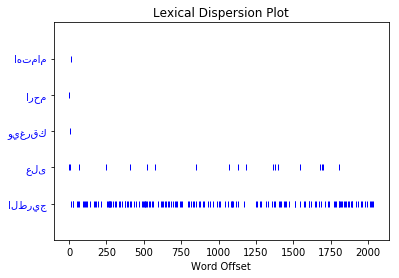

In [36]:
text_eda.dispersion_plot([u"اهتمام", "ارحم", "ويغرقك", "على", "الطريج"])

In [80]:
text_eda.similar("عجل")

In [ ]:
sorted([w for w in set(word_list) if len(w) > 2 and fdist1[w] > 10])

In [ ]:
word_length = [len(w) for w in text_eda]

In [ ]:
word_length[:10]

In [ ]:
fdist = FreqDist([len(w) for w in text_eda])

In [ ]:
print(fdist)

In [ ]:
fdist.items()

In [ ]:
fdist.max()

In [ ]:
fdist.freq(2)

In [40]:
import folium
map_osm = folium.Map(location=[26.8206, 30.8025], zoom_start=2.5)

In [43]:
eg_marker = folium.Marker([26.8206, 30.8025],
                                   popup='Egypt')

In [44]:
saudi_marker = folium.Marker([23.8859, 45.0792],
                                   popup='Saudi Arabia')

In [46]:
map_osm.add_child(eg_marker)

In [47]:
map_osm.add_child(saudi_marker)

In [48]:
oman_marker = folium.Marker([21.4735, 55.9754],
                                   popup='Oman')

In [49]:
map_osm.add_child(oman_marker)

In [129]:
data_kuwait = (np.random.normal(size=(53, 2)) *
        np.array([[.1, .1]]) +
        np.array([[29.3117, 47.4818]])).tolist()


In [130]:
data_kuwait[:2]


[[29.175503599042663, 47.38191344677489],
 [29.26645995407761, 47.65378950580348]]

In [147]:
data_eg = (np.random.normal(size=(200, 2)) *
        np.array([[1, 1]]) +
        np.array([[26.8206, 30.8025]])).tolist()

In [148]:
data_eg[:2]


[[28.49133747163001, 31.99060670162688],
 [26.59802390340164, 30.71304167083134]]

In [149]:
m = folium.Map([21.4735, 55.9754], tiles='stamentoner', zoom_start=3)

HeatMap(data_kuwait).add_to(m)
HeatMap(data_saud).add_to(m)
HeatMap(data_eg).add_to(m)
m

In [122]:
pwd

'/home/jovyan/capstone-35/eda'

In [124]:
m.save('../map_test.html')

In [126]:
data_saud = (np.random.normal(size=(3, 2)) *
        np.array([[.1, .1]]) +
        np.array([[23.8859, 45.0792]])).tolist()

In [128]:
data_saud[:10]

[[24.002451989820017, 45.203394543086645],
 [23.76932268380541, 44.9886096961717],
 [23.819637040876373, 44.97079894764741]]

In [131]:
data_uae = (np.random.normal(size=(2, 2)) *
        np.array([[.1, .1]]) +
        np.array([[3.4241, 53.8478]])).tolist()

In [111]:
df_batch_1.cleaned_geo.value_counts().head()

None               62
Kuwait             53
Saudi Arabia        3
UAE                 2
بعيدة عن المنال     1
Name: cleaned_geo, dtype: int64

In [110]:
df_batch_1['cleaned_geo'].value_counts

<bound method IndexOpsMixin.value_counts of 6                       UAE
7                    Dokhaa
17                     None
18                   Kuwait
22                     None
26                   Konoha
30                     None
37                   Kuwait
42                     None
46              مراح الوالد
48                   Hateen
51                   Kuwait
53            قيثارة الشّرق
55                     None
66                     None
68                     None
102                     UAE
105                  Kuwait
117            Saudi Arabia
121                    Lost
127                  Kuwait
128                 البحرين
133                    None
136                    None
140           Fullerton, CA
142                  Kuwait
145            +965 - CaiRo
158                  Kuwait
159                  Kuwait
161                       "
               ...         
352                  Kuwait
353           آلَكــوٌيــتـ
356                    None
357 